In [1]:
!pip install -U scikit-learn

In [3]:
import numpy as n
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("colorectal_cancer_prediction.csv")

In [9]:
df.head

<bound method NDFrame.head of        Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0               1   71    Male  Other         Europe          Urban   
1               2   34  Female  Black  North America          Urban   
2               3   80  Female  White  North America          Urban   
3               4   40    Male  Black  North America          Rural   
4               5   43  Female  White         Europe          Urban   
...           ...  ...     ...    ...            ...            ...   
89940       89941   72    Male  White  North America          Urban   
89941       89942   59  Female  Asian  North America          Urban   
89942       89943   77  Female  White         Africa          Rural   
89943       89944   37    Male  Other  North America          Rural   
89944       89945   69    Male  White         Europe          Urban   

      Socioeconomic_Status Family_History Previous_Cancer_History  \
0                   Middle            Yes       

In [29]:
df.describe

<bound method NDFrame.describe of        Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0               1   71    Male  Other         Europe          Urban   
1               2   34  Female  Black  North America          Urban   
2               3   80  Female  White  North America          Urban   
3               4   40    Male  Black  North America          Rural   
4               5   43  Female  White         Europe          Urban   
...           ...  ...     ...    ...            ...            ...   
89940       89941   72    Male  White  North America          Urban   
89941       89942   59  Female  Asian  North America          Urban   
89942       89943   77  Female  White         Africa          Rural   
89943       89944   37    Male  Other  North America          Rural   
89944       89945   69    Male  White         Europe          Urban   

      Socioeconomic_Status Family_History Previous_Cancer_History  \
0                   Middle            Yes   

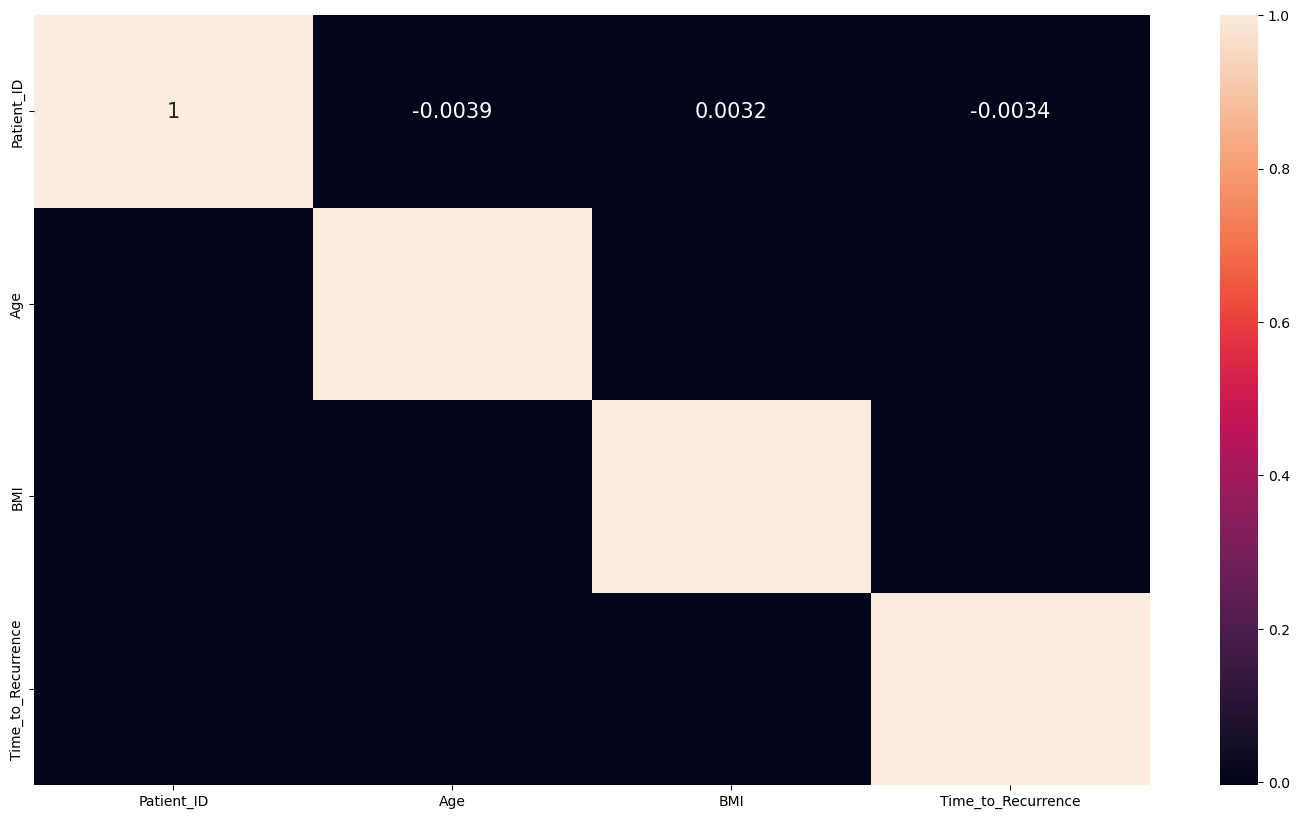

In [27]:
plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,annot_kws={'size':15})
plt.show()

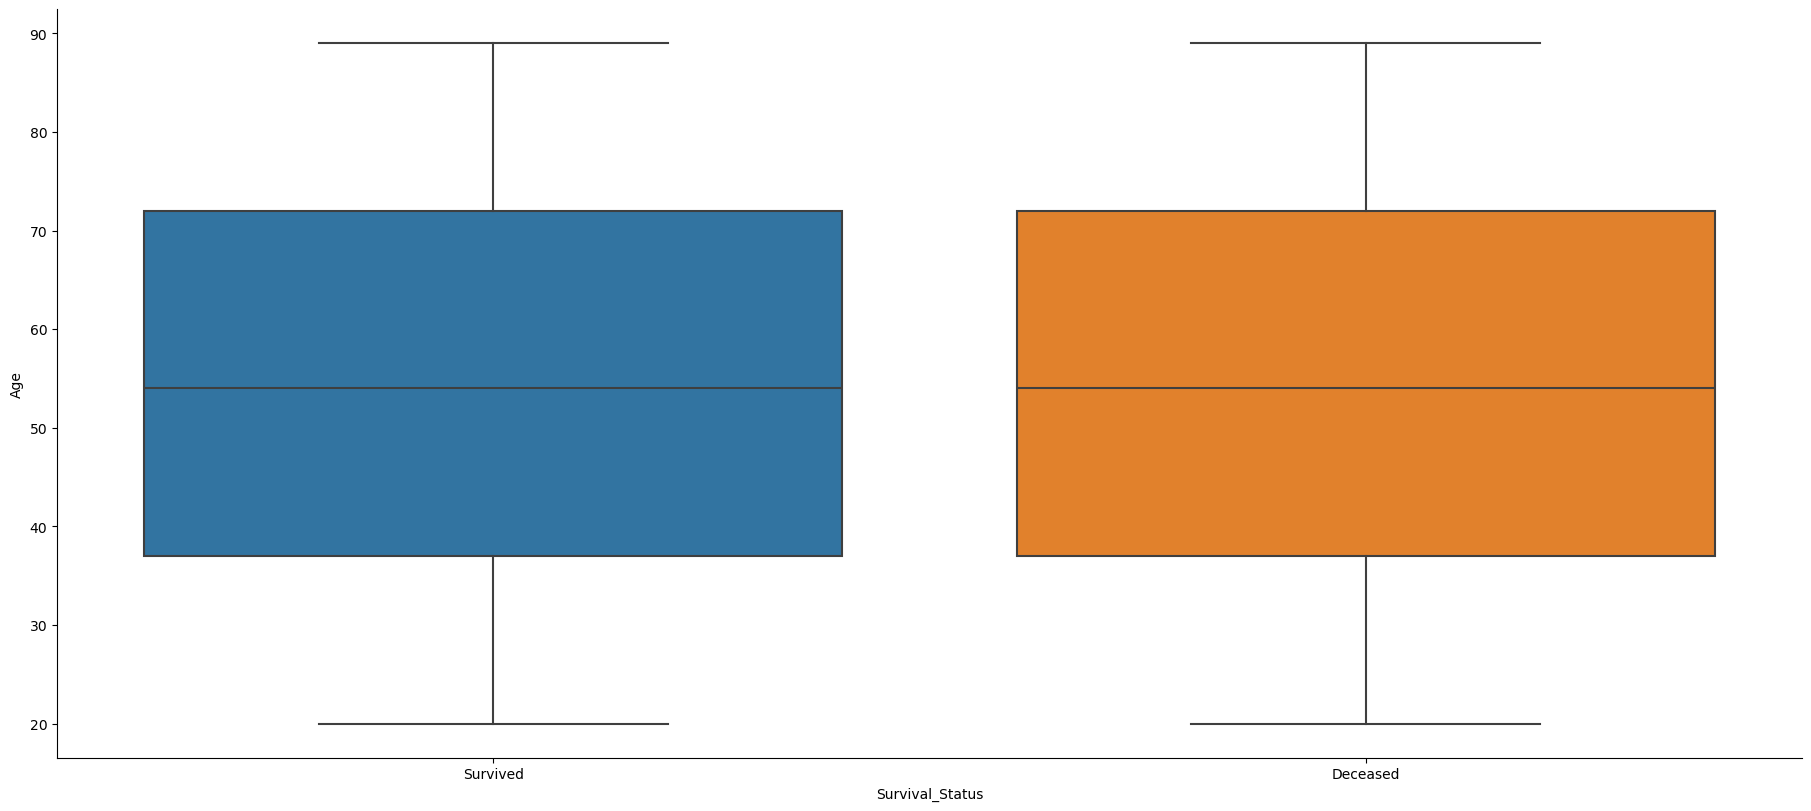

In [55]:
sns.catplot(x=df['Survival_Status'],y=df['Age'],data=df,kind='box',height=10,aspect=2)

C:\Users\purpl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


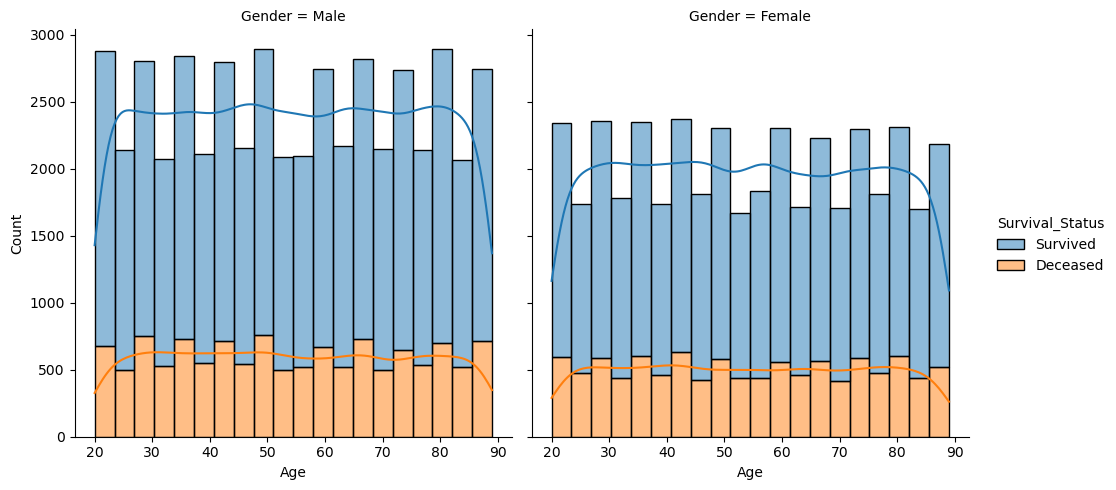

In [57]:
sns.displot(data=df,x='Age',kde=True,bins=20,hue='Survival_Status',multiple='stack',col='Gender')

Text(0.5, 0, 'Age')

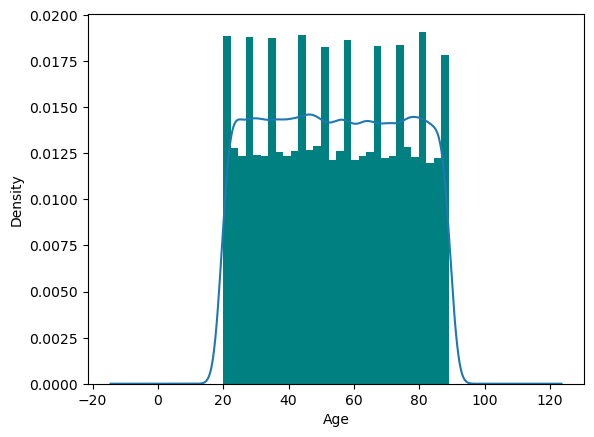

In [59]:
ax=df['Age'].hist(bins=30,color='teal',grid=False,density=True)
df['Age'].plot(kind='density')
ax.set_xlabel('Age')


In [187]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
from sklearn.model_selection import train_test_split

In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [81]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  
print(df.head())


   Patient_ID  Age  Gender  Race  Region  Urban_or_Rural  \
0           1   71       1     3       2               1   
1           2   34       0     1       4               1   
2           3   80       0     4       4               1   
3           4   40       1     1       4               0   
4           5   43       0     4       2               1   

   Socioeconomic_Status  Family_History  Previous_Cancer_History  \
0                     2               1                        0   
1                     2               0                        0   
2                     2               0                        0   
3                     1               0                        0   
4                     0               1                        0   

   Stage_at_Diagnosis  ...  Insurance_Coverage  Time_to_Diagnosis  \
0                   2  ...                   1                  0   
1                   0  ...                   0                  1   
2                   2  

In [193]:
y=df['Survival_Status']
x=df.drop(['Patient_ID'],axis=1)
x.drop(['Survival_Status'],axis=1,inplace=True)

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((62961, 28), (26984, 28), (62961,), (26984,))

In [211]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)


In [212]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

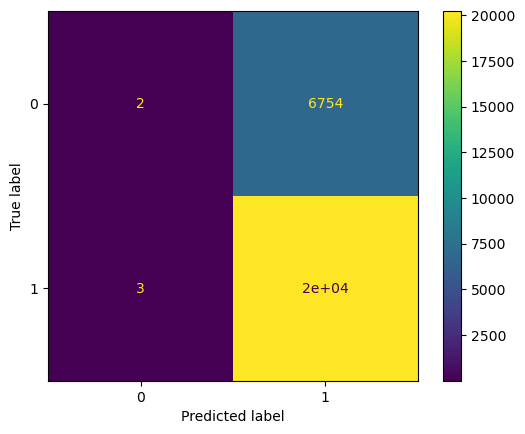

In [203]:
cm=confusion_matrix(y_test,y_predict)
disp=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()

In [213]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.40      0.00      0.00      6756
           1       0.75      1.00      0.86     20228

    accuracy                           0.75     26984
   macro avg       0.57      0.50      0.43     26984
weighted avg       0.66      0.75      0.64     26984



In [219]:
feat_imp=pd.DataFrame({'Feature':x.columns,'Importance':model.feature_importances_})
feat_imp

,Feature,Importance
0,Age,0.114568
1,Gender,0.019494
2,Race,0.040066
3,Region,0.042232
4,Urban_or_Rural,0.019007
5,Socioeconomic_Status,0.031243
6,Family_History,0.017600
7,Previous_Cancer_History,0.011631
8,Stage_at_Diagnosis,0.041721
9,Tumor_Aggressiveness,0.033218
